In [1]:
# Establising mysql coonection
import mysql.connector
# connecting mysql to python
db=mysql.connector.connect(host="localhost",user="root",passwd="pass123",database="datatrained")
print(db)

In [2]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load data from mysql db
df_student_marks = pd.read_sql_query("select * from student_marks",db)
df_student_marks

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


In [4]:
# Check for any null values
df_student_marks.isna().sum()

Name         0
Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

In [5]:
# Check the data types
df_student_marks.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [6]:
# Describe the table data
df_student_marks.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


In [7]:
# lets create a new column for total marks
total_marks=pd.Series()
total_marks=0
subjects=['Maths', 'Physics', 'Chemistry', 'English','Biology', 'Economics', 'History', 'Civics']
for subject in subjects:
    total_marks = total_marks+df_student_marks[subject]
    
df_student_marks["Total Marks"] = total_marks   
df_student_marks

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total Marks
0,John,M,05-04-1988,55,45,56,87,21,52,89,65,470
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2,524
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74,556
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45,586
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53,587
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52,556
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61,496
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87,517
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89,587
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77,566


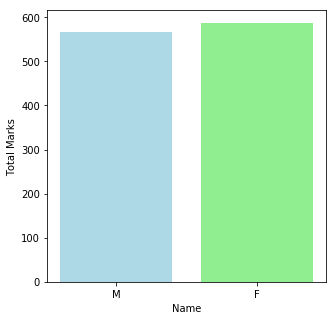

In [8]:
# lets graphically plot total marks of male vs total marks of female
plt.figure(figsize=(5,5))
plt.bar(df_student_marks["Gender"], df_student_marks["Total Marks"], color=("lightgreen", "lightblue"))
plt.xlabel("Name")
plt.ylabel("Total Marks")
plt.show()

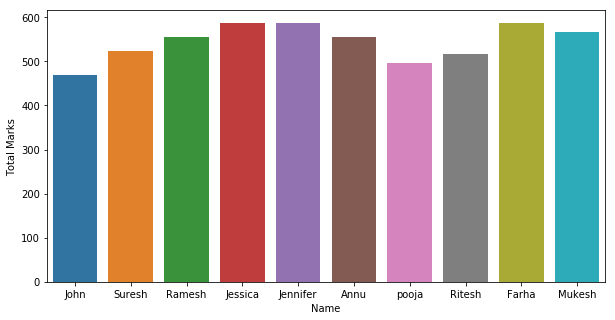

In [9]:
# Lets compare the total marks of each student
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=df_student_marks["Name"], y=df_student_marks["Total Marks"], ax=ax,  data=df_student_marks)
plt.show()


### EDA with Titanic dataset

In [10]:
# Load titanic dataset
df_titanic=pd.read_sql_query("select * from titanic_data", db)
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,None,S
5,6,0,3,"Moran, Mr. James",male,None,0,0,330877,8.4583,None,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,None,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,None,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,None,C


In [11]:
# Check the data types
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
# Fill the null values using mean, median and mode
df_titanic['Age']=df_titanic['Age'].fillna((df_titanic['Age'].median()))
df_titanic['Cabin']=df_titanic.replace(np.NaN,df_titanic['Cabin'].mode())
df_titanic['Embarked']=df_titanic.replace(np.NaN,df_titanic['Embarked'].mode())

In [13]:
df_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,3,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,4,4
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,5,5
5,6,0,3,"Moran, Mr. James",male,28,0,0,330877,8.4583,6,6
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,7,7
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,8,8
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,9,9
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,10,10


In [15]:
# Check the data shape
df_titanic.shape

(891, 12)

In [16]:
# Describe the table data
df_titanic.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204203
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693412
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329000


In [17]:
# In the above table Age is not displayed, lets check the data types
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
# Change Age data type to integer
df_titanic['Age'] = pd.to_numeric(df_titanic['Age'], errors='coerce').fillna(0).astype(np.int64)

In [19]:
# Again describe the table data
df_titanic.describe()
# From the below details, Age and Fare column contains outliers

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.345679,0.523008,0.381594,32.204203
std,257.353842,0.486592,0.836071,13.028212,1.102743,0.806057,49.693412
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329000


In [20]:
# Lets group data based on sex
groupedvalues = df_titanic.groupby('Sex').sum().reset_index()
groupedvalues.head()

,Sex,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,female,135343,233,678,8767,218,204,13966.6601
1,male,262043,109,1379,17380,248,136,14727.2847


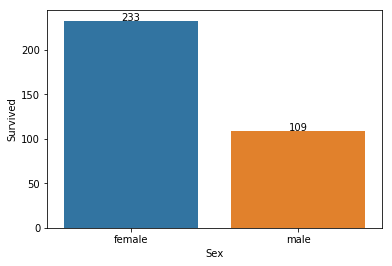

In [21]:
# Lets plot the count of survived people based on sex
g =sns.barplot(x='Sex',y='Survived',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.Survived, round(row.Survived,2), color='black', ha="center")

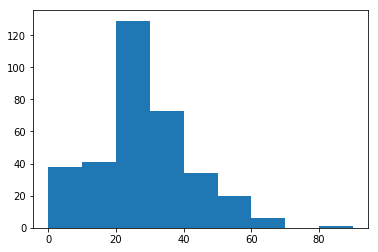

In [22]:
# Lets check what age range maximum people survived
plt.hist(x="Age",bins=range(0,100,10),data=df_titanic.loc[df_titanic["Survived"]==1])
plt.show()

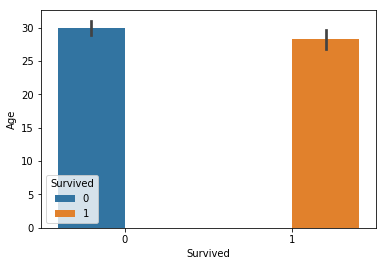

In [23]:
# Lets check What is the average age of survived and not survived
sns.barplot(x="Survived", y="Age", hue="Survived", data=df_titanic)
plt.show()

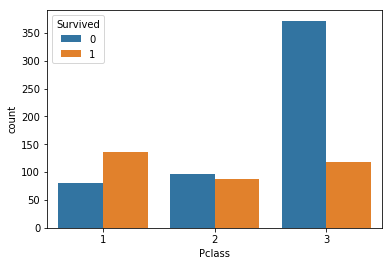

In [24]:
#lets check the number of people who survived and not survived in each class
sns.countplot(x="Pclass",hue="Survived",data=df_titanic)
plt.show()

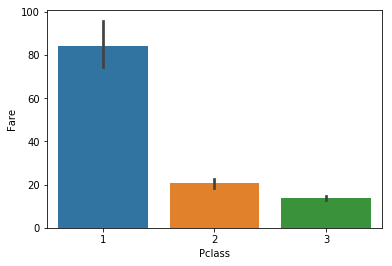

In [25]:
# Lets check what is the averge fare price for the classes
sns.barplot(x="Pclass",y="Fare",data=df_titanic)
plt.show()
# 1st class has more fare price